In [1]:
pip install -e .

Obtaining file:///home/natalie/nsalab/Users/naw1/desk2/dl/gym-child
  Attempting uninstall: gym-maze
    Found existing installation: gym-maze 0.4
    Uninstalling gym-maze-0.4:
      Successfully uninstalled gym-maze-0.4
  Running setup.py develop for gym-maze
Note: you may need to restart the kernel to use updated packages.


# Q Learning Training Environment

In [1]:
import gym
#import gym_child
import gym_teen
import numpy as np
import time
import sys
import math
import random
import matplotlib.pyplot as plt

In [2]:
def get_explore_rate(t,min_explore_rate,decay_fact):
    return max(min_explore_rate, min(0.8, 1.0 - math.log10((t+1)/decay_fact)))


def get_learning_rate(t,min_learning_rate,decay_fact):
    return max(min_learning_rate, min(0.8, 1.0 - math.log10((t+1)/decay_fact)))

In [3]:
# variables: 
neps = 40
tstep = 200
min_explore_rate = 0.001
min_learning_rate = 0.2
#grid_size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
#decay_fact = np.prod(grid_size, dtype=float) / 10.0
decay_fact = np.prod((9,9),dtype=float)/10.0
#state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
explore_rate = get_explore_rate(0,min_explore_rate,decay_fact)
learning_rate = get_learning_rate(0,min_learning_rate,decay_fact)

max_t = np.prod((9,9),dtype=int)*100
streak_to_end = 100
solved_t = np.prod((9,9),dtype=int)

In [4]:
def select_action(env,state, q_table,explore_rate):
    # Select a random action
    if random.random() < explore_rate:
        action = env.action_space.sample()
    # Select the action with the highest q
    else:
        action = int(np.argmax(q_table[state]))
    return action
    


In [5]:
def state_to_bucket(state,env):
    grid_size = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
    state_bounds = list(zip(env.observation_space.low, env.observation_space.high))
    bucket_indice = []
    for i in range(len(state)):
        if state[i] <= state_bounds[i][0]:
            bucket_index = 0
        elif state[i] >= state_bounds[i][1]:
            bucket_index = grid_size[i] - 1
        else:
            # Mapping the state bounds to the bucket array
            bound_width = state_bounds[i][1] - state_bounds[i][0]
            offset = (grid_size[i]-1)*state_bounds[i][0]/bound_width
            scaling = (grid_size[i]-1)/bound_width
            bucket_index = int(round(scaling*state[i] - offset))
        bucket_indice.append(bucket_index)
    return tuple(bucket_indice)



In [6]:
def run_qlearn(env,q_table, explore_rate, learning_rate, neps=200,tstep=100):
    env.render()
    num_streaks = 0
    discount_factor = 0.99
    max_t = np.prod((9,9),dtype=int)*100
    streak_to_end = 100
    solved_t = np.prod((9,9),dtype=int)
    decay_fact = np.prod((9,9),dtype=float)/10.0
    num_steps = []
    episode_reward = []
    
    for ep in range(neps):
        if ep == 0:
            time.sleep(5)
        obv = env.reset()
        print('------------'+str(ep))
        state_0 = state_to_bucket(obv,env)
        total_reward = 0.0

        
        for t in range(tstep):
            # select best action and execute
            action = select_action(env,state_0, q_table, explore_rate)
            obv,reward,done,_ = env.step(action)
            
            # update the state you are in, add reward (observe result)
            state = state_to_bucket(obv,env)
            total_reward += reward
            #print('cur' + str(reward))
            #print(total_reward)
            #print(reward, total_reward)
            
            # update Q-table
            best_q = np.amax(q_table[state])
            q_table[state_0 + (action,)] += learning_rate * (reward + discount_factor * (best_q) - q_table[state_0 + (action,)])
            
            # update state
            state_0 = state
            
            env.render()
            time.sleep(0.1)

            # update parameters
            #explore_rate = get_explore_rate(ep,min_explore_rate,decay_fact)
            #learning_rate = get_learning_rate(ep,min_learning_rate,decay_fact)
            
            if done:
                episode_reward.append(total_reward)
                num_steps.append(t+1)

                
                plt.imshow(env.render())
                plt.show()

                time.sleep(1)
                print("Episode %d finished after %f time steps with total reward = %f (streak %d)."
                      % (ep, t, total_reward, num_streaks))

                if t <= solved_t:
                    num_streaks += 1
                else:
                    num_streaks = 0
                break

            elif t >= max_t - 1:
                print("Episode %d timed out at %d with total reward = %f."
                      % (ep, t, total_reward))

        # It's considered done when it's solved over 120 times consecutively
        if num_streaks > streak_to_end:
            break
            
        explore_rate = get_explore_rate(ep,0.001,decay_fact)
        learning_rate = get_learning_rate(ep,0.2,decay_fact)
                
    return q_table, num_steps, episode_reward

pygame 2.1.2 (SDL 2.0.18, Python 3.7.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
------------0
(163, 139)
current distance is: 11.40175425099138, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


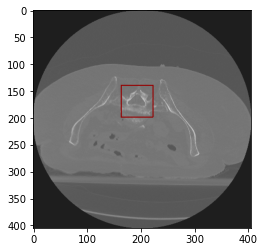

Episode 0 finished after 194.000000 time steps with total reward = 20.000000 (streak 0).
------------1
(154, 135)
current distance is: 13.601470508735444, and future distance is 8.06225774829855


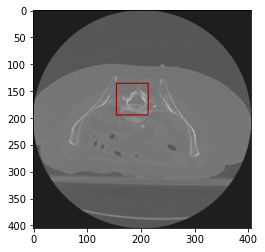

Episode 1 finished after 468.000000 time steps with total reward = 17.000000 (streak 0).
------------2
(166, 142)
current distance is: 16.492422502470642, and future distance is 7.211102550927978
the stepsize has decreased and is now 5


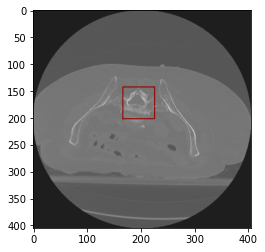

Episode 2 finished after 353.000000 time steps with total reward = 8.000000 (streak 0).
------------3
(164, 130)
current distance is: 16.1245154965971, and future distance is 6.324555320336759
the stepsize has decreased and is now 5


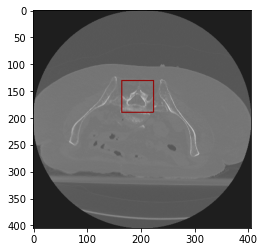

Episode 3 finished after 92.000000 time steps with total reward = 9.000000 (streak 0).
------------4
(169, 134)
current distance is: 10.63014581273465, and future distance is 7.280109889280518


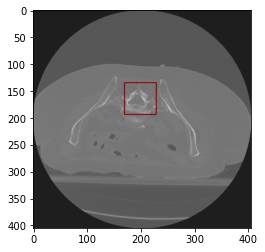

Episode 4 finished after 16.000000 time steps with total reward = 1.000000 (streak 0).
------------5
(159, 135)
current distance is: 13.038404810405298, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


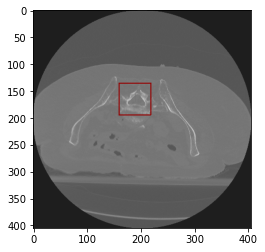

Episode 5 finished after 830.000000 time steps with total reward = 17.000000 (streak 1).
------------6
(154, 132)
current distance is: 18.439088914585774, and future distance is 8.94427190999916
the stepsize has decreased and is now 5


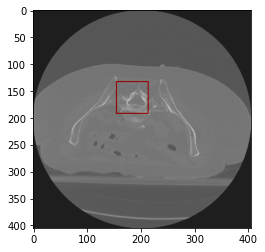

Episode 6 finished after 245.000000 time steps with total reward = 12.000000 (streak 0).
------------7
(157, 137)
current distance is: 10.295630140987, and future distance is 5.0990195135927845
the stepsize has decreased and is now 5


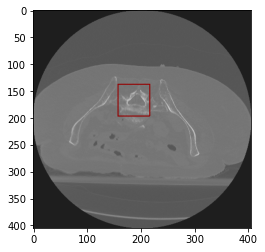

Episode 7 finished after 333.000000 time steps with total reward = 11.000000 (streak 0).
------------8
(162, 132)
current distance is: 10.770329614269007, and future distance is 4.0
the stepsize has decreased and is now 5


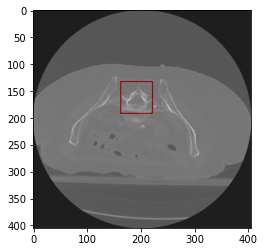

Episode 8 finished after 396.000000 time steps with total reward = 16.000000 (streak 0).
------------9
(168, 136)
current distance is: 11.661903789690601, and future distance is 6.0


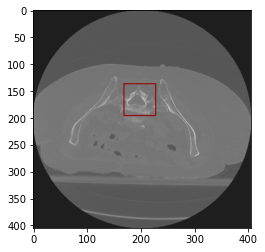

Episode 9 finished after 660.000000 time steps with total reward = 30.000000 (streak 0).
------------10
(153, 138)
current distance is: 15.0, and future distance is 9.219544457292887


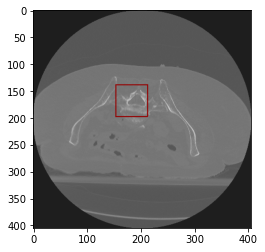

Episode 10 finished after 81.000000 time steps with total reward = 14.000000 (streak 0).
------------11
(158, 135)
current distance is: 11.704699910719626, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


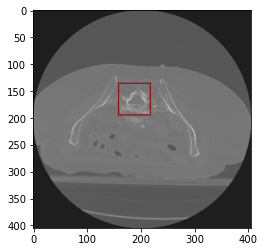

Episode 11 finished after 676.000000 time steps with total reward = 15.000000 (streak 1).
------------12
(159, 131)
current distance is: 15.297058540778355, and future distance is 5.830951894845301
the stepsize has decreased and is now 5


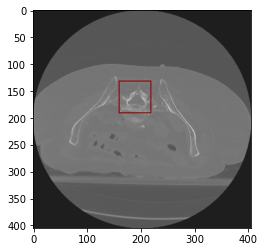

Episode 12 finished after 1170.000000 time steps with total reward = 18.000000 (streak 0).
------------13
(163, 127)
current distance is: 19.026297590440446, and future distance is 9.055385138137417
the stepsize has decreased and is now 5


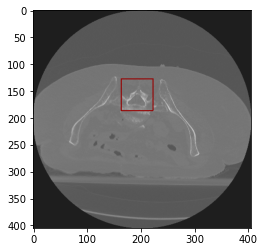

Episode 13 finished after 455.000000 time steps with total reward = 15.000000 (streak 0).
------------14
(162, 141)
current distance is: 11.180339887498949, and future distance is 5.0
the stepsize has decreased and is now 5


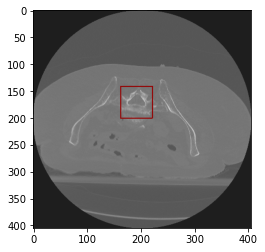

Episode 14 finished after 358.000000 time steps with total reward = -9.000000 (streak 0).
------------15
(165, 135)
current distance is: 13.038404810405298, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


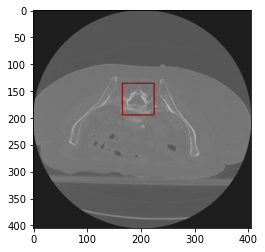

Episode 15 finished after 184.000000 time steps with total reward = 21.000000 (streak 0).
------------16
(155, 131)
current distance is: 16.55294535724685, and future distance is 8.602325267042627


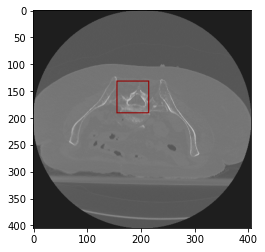

Episode 16 finished after 442.000000 time steps with total reward = 28.000000 (streak 0).
------------17
(160, 127)
current distance is: 15.0, and future distance is 9.219544457292887


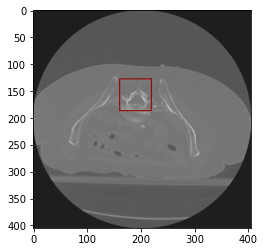

Episode 17 finished after 7.000000 time steps with total reward = 4.000000 (streak 0).
------------18
(159, 128)
current distance is: 18.24828759089466, and future distance is 8.54400374531753
the stepsize has decreased and is now 5


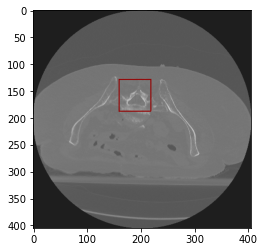

Episode 18 finished after 252.000000 time steps with total reward = 11.000000 (streak 1).
------------19
(153, 138)
current distance is: 15.0, and future distance is 9.219544457292887


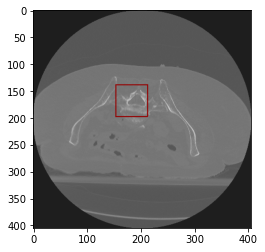

Episode 19 finished after 67.000000 time steps with total reward = 22.000000 (streak 0).
------------20
(161, 137)
current distance is: 11.045361017187261, and future distance is 1.4142135623730951
the stepsize has decreased and is now 5


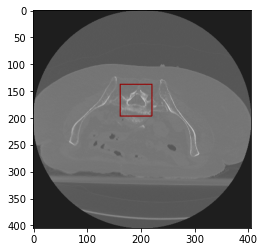

Episode 20 finished after 310.000000 time steps with total reward = 24.000000 (streak 1).
------------21
(170, 137)
current distance is: 12.041594578792296, and future distance is 8.06225774829855


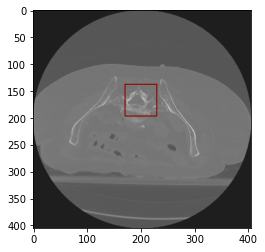

Episode 21 finished after 449.000000 time steps with total reward = 8.000000 (streak 0).
------------22
(162, 140)
current distance is: 14.0, and future distance is 4.0
the stepsize has decreased and is now 5


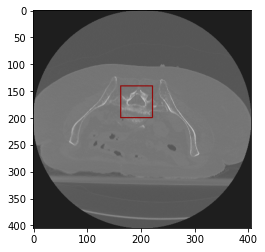

Episode 22 finished after 40.000000 time steps with total reward = 21.000000 (streak 0).
------------23
(167, 128)
current distance is: 18.681541692269406, and future distance is 9.433981132056603


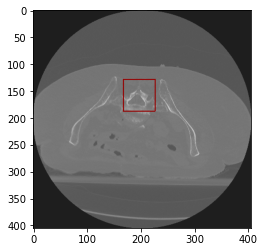

Episode 23 finished after 322.000000 time steps with total reward = 17.000000 (streak 1).
------------24
(164, 137)
current distance is: 12.041594578792296, and future distance is 2.23606797749979
the stepsize has decreased and is now 5


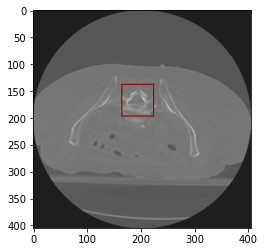

Episode 24 finished after 349.000000 time steps with total reward = 10.000000 (streak 0).
------------25
(171, 139)
current distance is: 19.235384061671343, and future distance is 9.486832980505138
the stepsize has decreased and is now 5


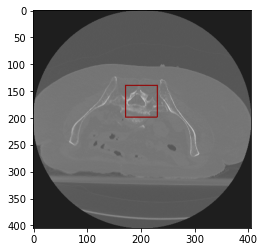

Episode 25 finished after 473.000000 time steps with total reward = 18.000000 (streak 0).
------------26
(172, 136)
current distance is: 20.0, and future distance is 10.0
the stepsize has decreased and is now 5


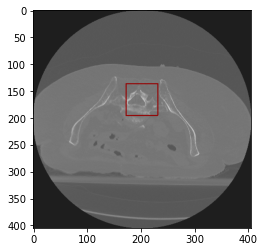

Episode 26 finished after 127.000000 time steps with total reward = 6.000000 (streak 0).
------------27
(154, 135)
current distance is: 18.027756377319946, and future distance is 8.06225774829855
the stepsize has decreased and is now 5


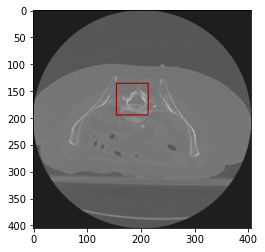

Episode 27 finished after 35.000000 time steps with total reward = 12.000000 (streak 0).
------------28
(160, 131)
current distance is: 13.0, and future distance is 5.385164807134504
the stepsize has decreased and is now 5


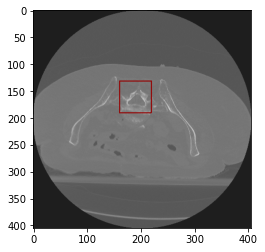

Episode 28 finished after 262.000000 time steps with total reward = 18.000000 (streak 1).
------------29
(158, 131)
current distance is: 15.524174696260024, and future distance is 6.4031242374328485
the stepsize has decreased and is now 5


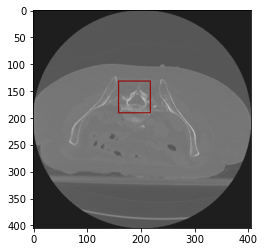

Episode 29 finished after 370.000000 time steps with total reward = 23.000000 (streak 0).
------------30
(163, 142)
current distance is: 12.529964086141668, and future distance is 6.082762530298219
the stepsize has decreased and is now 5


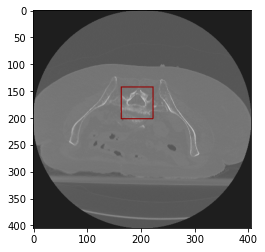

Episode 30 finished after 316.000000 time steps with total reward = 13.000000 (streak 0).
------------31
(155, 131)
current distance is: 16.55294535724685, and future distance is 8.602325267042627


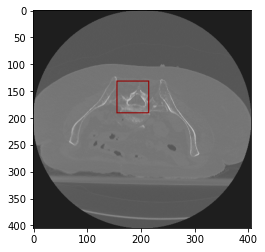

Episode 31 finished after 270.000000 time steps with total reward = 12.000000 (streak 0).
------------32
(171, 134)
current distance is: 15.0, and future distance is 9.219544457292887


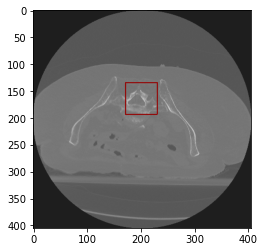

Episode 32 finished after 356.000000 time steps with total reward = 23.000000 (streak 0).
------------33
(157, 133)
current distance is: 13.92838827718412, and future distance is 5.830951894845301
the stepsize has decreased and is now 5


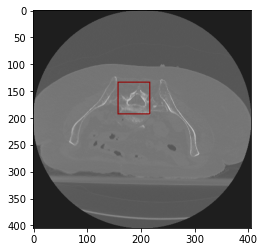

Episode 33 finished after 134.000000 time steps with total reward = 9.000000 (streak 0).
------------34
(158, 130)
current distance is: 16.492422502470642, and future distance is 7.211102550927978
the stepsize has decreased and is now 5


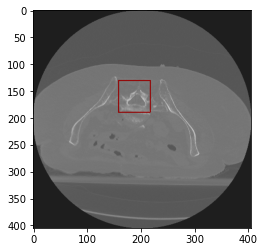

Episode 34 finished after 247.000000 time steps with total reward = 10.000000 (streak 0).
------------35
(163, 127)
current distance is: 19.026297590440446, and future distance is 9.055385138137417
the stepsize has decreased and is now 5


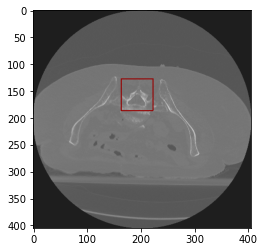

Episode 35 finished after 22.000000 time steps with total reward = 7.000000 (streak 0).
------------36
(172, 136)
current distance is: 20.0, and future distance is 10.0
the stepsize has decreased and is now 5


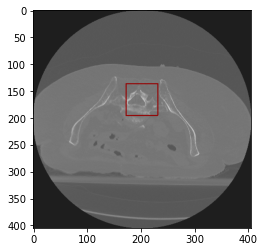

Episode 36 finished after 232.000000 time steps with total reward = 23.000000 (streak 1).
------------37
(170, 140)
current distance is: 18.439088914585774, and future distance is 8.94427190999916
the stepsize has decreased and is now 5


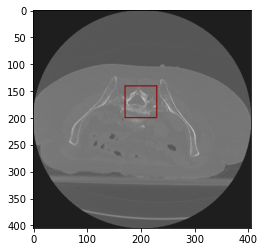

Episode 37 finished after 425.000000 time steps with total reward = 31.000000 (streak 0).
------------38
(162, 144)
current distance is: 12.806248474865697, and future distance is 8.0


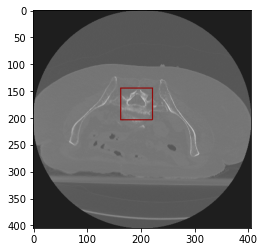

Episode 38 finished after 193.000000 time steps with total reward = 14.000000 (streak 0).
------------39
(155, 129)
current distance is: 18.384776310850235, and future distance is 9.899494936611665


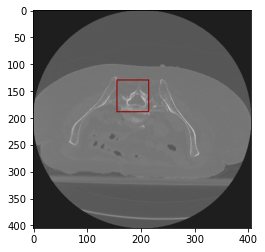

Episode 39 finished after 279.000000 time steps with total reward = 4.000000 (streak 0).
------------40
(157, 131)
current distance is: 15.811388300841896, and future distance is 7.0710678118654755
the stepsize has decreased and is now 5


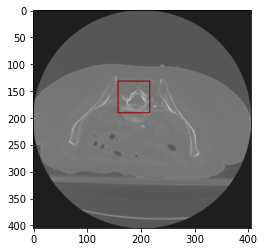

Episode 40 finished after 245.000000 time steps with total reward = 11.000000 (streak 0).
------------41
(165, 133)
current distance is: 13.341664064126334, and future distance is 4.242640687119285
the stepsize has decreased and is now 5


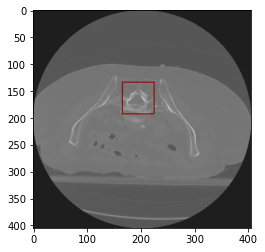

Episode 41 finished after 112.000000 time steps with total reward = 18.000000 (streak 0).
------------42
(153, 133)
current distance is: 19.235384061671343, and future distance is 9.486832980505138
the stepsize has decreased and is now 5


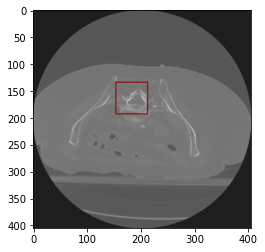

Episode 42 finished after 154.000000 time steps with total reward = 2.000000 (streak 0).
------------43
(162, 130)
current distance is: 16.0, and future distance is 6.0
the stepsize has decreased and is now 5


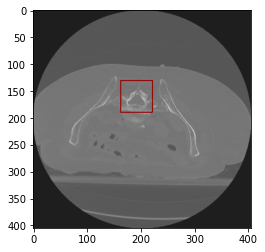

Episode 43 finished after 144.000000 time steps with total reward = 22.000000 (streak 0).
------------44
(154, 134)
current distance is: 14.422205101855956, and future distance is 8.246211251235321


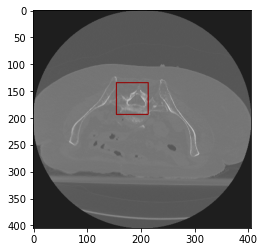

Episode 44 finished after 236.000000 time steps with total reward = 24.000000 (streak 0).
------------45
(154, 136)
current distance is: 18.0, and future distance is 8.0
the stepsize has decreased and is now 5


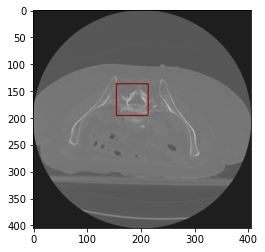

Episode 45 finished after 41.000000 time steps with total reward = 18.000000 (streak 0).
------------46
(154, 139)
current distance is: 18.24828759089466, and future distance is 8.54400374531753
the stepsize has decreased and is now 5


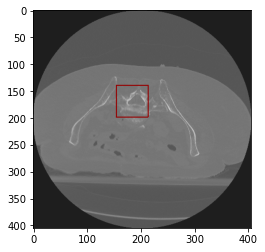

Episode 46 finished after 35.000000 time steps with total reward = 18.000000 (streak 1).
------------47
(162, 137)
current distance is: 10.04987562112089, and future distance is 1.0
the stepsize has decreased and is now 5


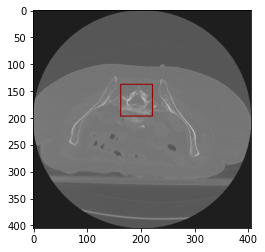

Episode 47 finished after 165.000000 time steps with total reward = 20.000000 (streak 2).
------------48
(169, 136)
current distance is: 17.0, and future distance is 7.0
the stepsize has decreased and is now 5


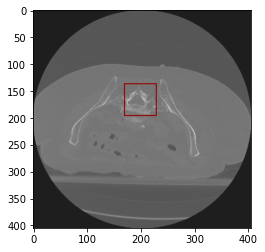

Episode 48 finished after 491.000000 time steps with total reward = 12.000000 (streak 0).
------------49
(159, 135)
current distance is: 11.40175425099138, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


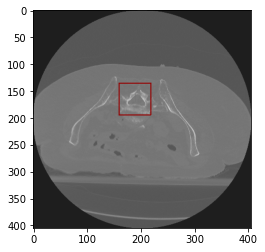

Episode 49 finished after 227.000000 time steps with total reward = 19.000000 (streak 0).
------------50
(165, 133)
current distance is: 13.341664064126334, and future distance is 4.242640687119285
the stepsize has decreased and is now 5


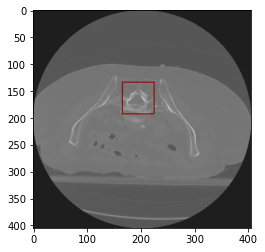

Episode 50 finished after 104.000000 time steps with total reward = 8.000000 (streak 0).
------------51
(163, 139)
current distance is: 11.40175425099138, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


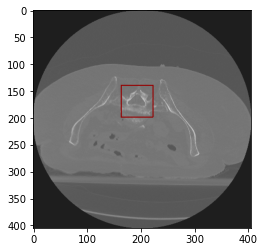

Episode 51 finished after 20.000000 time steps with total reward = 7.000000 (streak 0).
------------52
(156, 138)
current distance is: 16.1245154965971, and future distance is 6.324555320336759
the stepsize has decreased and is now 5


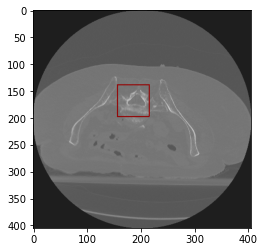

Episode 52 finished after 197.000000 time steps with total reward = 11.000000 (streak 1).
------------53
(171, 140)
current distance is: 19.4164878389476, and future distance is 9.848857801796104


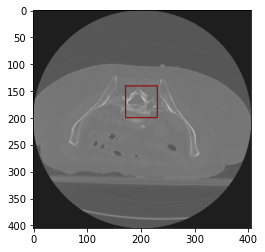

Episode 53 finished after 249.000000 time steps with total reward = 9.000000 (streak 0).
------------54
(167, 129)
current distance is: 17.72004514666935, and future distance is 8.602325267042627
the stepsize has decreased and is now 5


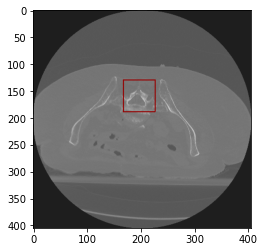

Episode 54 finished after 387.000000 time steps with total reward = 16.000000 (streak 0).
------------55
(154, 133)
current distance is: 18.24828759089466, and future distance is 8.54400374531753
the stepsize has decreased and is now 5


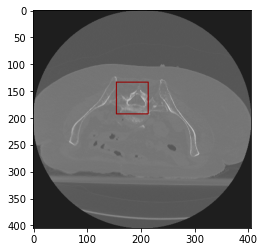

Episode 55 finished after 449.000000 time steps with total reward = 10.000000 (streak 0).
------------56
(156, 141)
current distance is: 16.15549442140351, and future distance is 7.810249675906654
the stepsize has decreased and is now 5


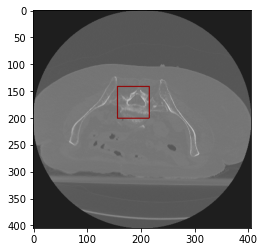

Episode 56 finished after 5.000000 time steps with total reward = 4.000000 (streak 0).
------------57
(162, 138)
current distance is: 10.198039027185569, and future distance is 2.0
the stepsize has decreased and is now 5


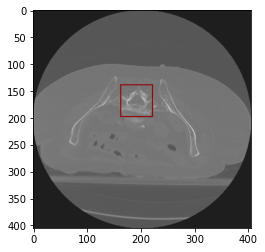

Episode 57 finished after 357.000000 time steps with total reward = 7.000000 (streak 1).
------------58
(164, 131)
current distance is: 13.0, and future distance is 5.385164807134504
the stepsize has decreased and is now 5


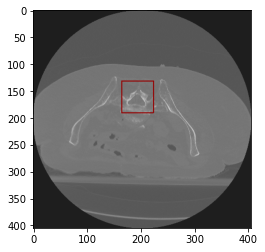

Episode 58 finished after 440.000000 time steps with total reward = 0.000000 (streak 0).
------------59
(169, 132)
current distance is: 17.46424919657298, and future distance is 8.06225774829855
the stepsize has decreased and is now 5


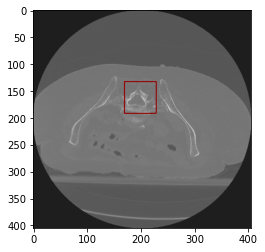

Episode 59 finished after 283.000000 time steps with total reward = 23.000000 (streak 0).
------------60
(154, 132)
current distance is: 18.439088914585774, and future distance is 8.94427190999916
the stepsize has decreased and is now 5


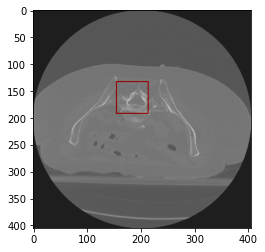

Episode 60 finished after 69.000000 time steps with total reward = 11.000000 (streak 0).
------------61
(163, 135)
current distance is: 11.045361017187261, and future distance is 1.4142135623730951
the stepsize has decreased and is now 5


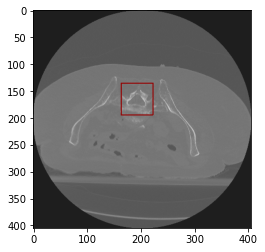

Episode 61 finished after 67.000000 time steps with total reward = 10.000000 (streak 1).
------------62
(162, 133)
current distance is: 13.0, and future distance is 3.0
the stepsize has decreased and is now 5


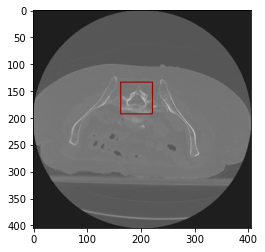

Episode 62 finished after 623.000000 time steps with total reward = 28.000000 (streak 2).
------------63
(166, 130)
current distance is: 16.492422502470642, and future distance is 7.211102550927978
the stepsize has decreased and is now 5


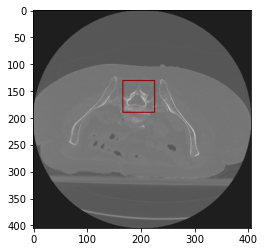

Episode 63 finished after 334.000000 time steps with total reward = 11.000000 (streak 0).
------------64
(163, 137)
current distance is: 11.045361017187261, and future distance is 1.4142135623730951
the stepsize has decreased and is now 5


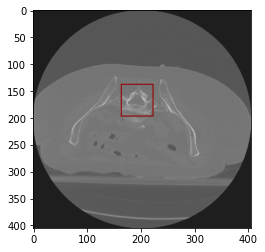

Episode 64 finished after 30.000000 time steps with total reward = 19.000000 (streak 0).
------------65
(166, 135)
current distance is: 14.035668847618199, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


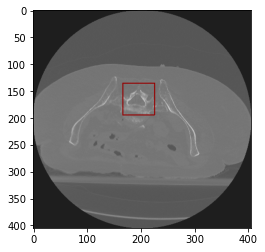

Episode 65 finished after 226.000000 time steps with total reward = 12.000000 (streak 1).
------------66
(159, 140)
current distance is: 13.601470508735444, and future distance is 5.0
the stepsize has decreased and is now 5


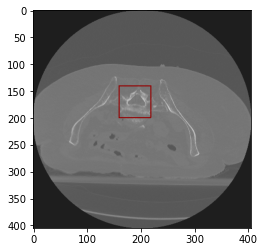

Episode 66 finished after 291.000000 time steps with total reward = 9.000000 (streak 0).
------------67
(167, 136)
current distance is: 11.180339887498949, and future distance is 5.0
the stepsize has decreased and is now 5


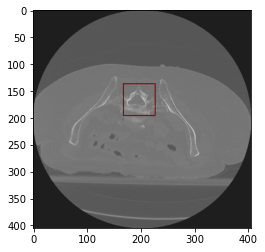

Episode 67 finished after 182.000000 time steps with total reward = 23.000000 (streak 0).
------------68
(153, 135)
current distance is: 19.026297590440446, and future distance is 9.055385138137417
the stepsize has decreased and is now 5


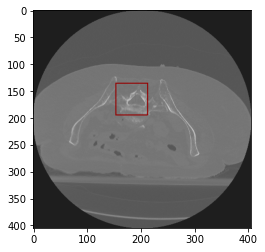

Episode 68 finished after 441.000000 time steps with total reward = 8.000000 (streak 0).
------------69
(156, 141)
current distance is: 16.76305461424021, and future distance is 7.810249675906654
the stepsize has decreased and is now 5


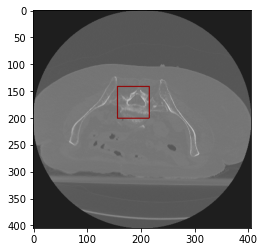

Episode 69 finished after 484.000000 time steps with total reward = -5.000000 (streak 0).
------------70
(166, 134)
current distance is: 14.142135623730951, and future distance is 4.47213595499958
the stepsize has decreased and is now 5


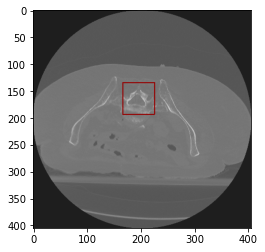

Episode 70 finished after 510.000000 time steps with total reward = 4.000000 (streak 0).
------------71
(158, 129)
current distance is: 17.46424919657298, and future distance is 8.06225774829855
the stepsize has decreased and is now 5


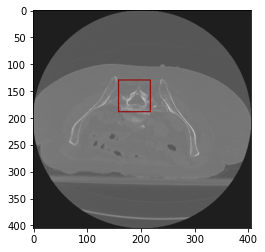

Episode 71 finished after 573.000000 time steps with total reward = 23.000000 (streak 0).
------------72
(159, 140)
current distance is: 13.601470508735444, and future distance is 5.0
the stepsize has decreased and is now 5


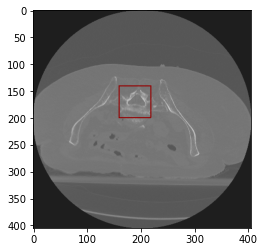

Episode 72 finished after 61.000000 time steps with total reward = 7.000000 (streak 0).
------------73
(168, 140)
current distance is: 16.492422502470642, and future distance is 7.211102550927978
the stepsize has decreased and is now 5


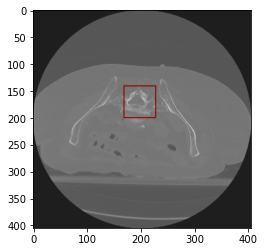

Episode 73 finished after 50.000000 time steps with total reward = 3.000000 (streak 1).
------------74
(155, 140)
current distance is: 15.652475842498529, and future distance is 8.06225774829855


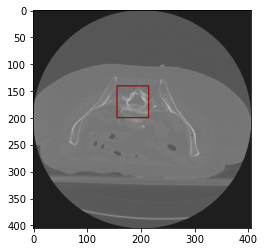

Episode 74 finished after 13.000000 time steps with total reward = 10.000000 (streak 2).
------------75
(158, 135)
current distance is: 11.704699910719626, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


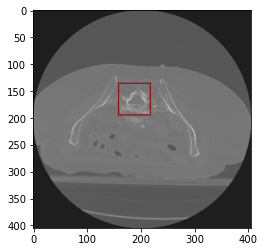

Episode 75 finished after 20.000000 time steps with total reward = 11.000000 (streak 3).
------------76
(168, 136)
current distance is: 16.0, and future distance is 6.0
the stepsize has decreased and is now 5


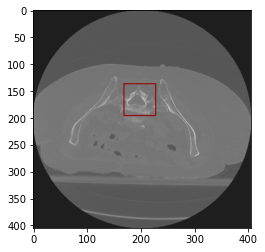

Episode 76 finished after 68.000000 time steps with total reward = 13.000000 (streak 4).
------------77
(158, 136)
current distance is: 10.770329614269007, and future distance is 4.0
the stepsize has decreased and is now 5


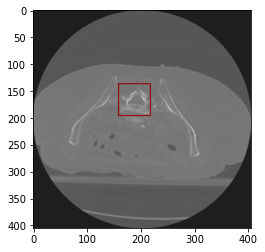

Episode 77 finished after 260.000000 time steps with total reward = 4.000000 (streak 5).
------------78
(163, 132)
current distance is: 11.704699910719626, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


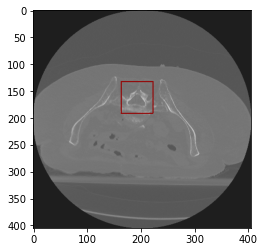

Episode 78 finished after 257.000000 time steps with total reward = 17.000000 (streak 0).
------------79
(171, 135)
current distance is: 19.026297590440446, and future distance is 9.055385138137417
the stepsize has decreased and is now 5


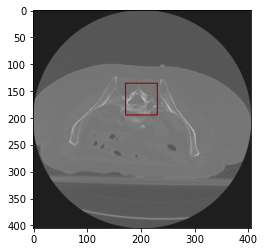

Episode 79 finished after 731.000000 time steps with total reward = 19.000000 (streak 0).
------------80
(168, 133)
current distance is: 14.317821063276353, and future distance is 6.708203932499369
the stepsize has decreased and is now 5


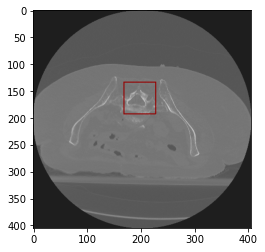

Episode 80 finished after 1477.000000 time steps with total reward = 16.000000 (streak 0).
------------81
(159, 127)
current distance is: 19.235384061671343, and future distance is 9.486832980505138
the stepsize has decreased and is now 5


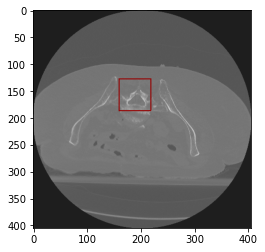

Episode 81 finished after 7315.000000 time steps with total reward = 3.000000 (streak 0).
------------82
(168, 143)
current distance is: 18.027756377319946, and future distance is 9.219544457292887


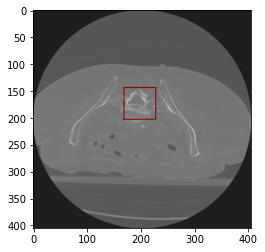

Episode 82 finished after 16.000000 time steps with total reward = 17.000000 (streak 0).
------------83
Episode 83 timed out at 8099 with total reward = 3.000000.
------------84
(166, 135)
current distance is: 14.035668847618199, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


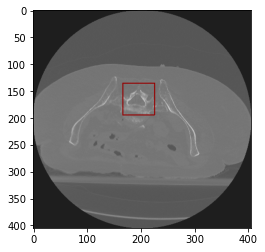

Episode 84 finished after 5226.000000 time steps with total reward = 14.000000 (streak 1).
------------85
Episode 85 timed out at 8099 with total reward = 11.000000.
------------86
Episode 86 timed out at 8099 with total reward = -5.000000.
------------87
(154, 121)
current distance is: 9.433981132056603, and future distance is 17.0


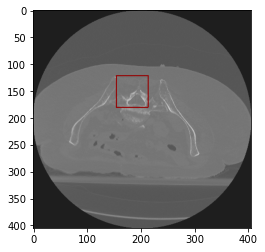

Episode 87 finished after 0.000000 time steps with total reward = 1.000000 (streak 0).
------------88
Episode 88 timed out at 8099 with total reward = -9.000000.
------------89
Episode 89 timed out at 8099 with total reward = -8.000000.
------------90
Episode 90 timed out at 8099 with total reward = -3.000000.
------------91
(167, 138)
current distance is: 15.132745950421556, and future distance is 5.385164807134504
the stepsize has decreased and is now 5


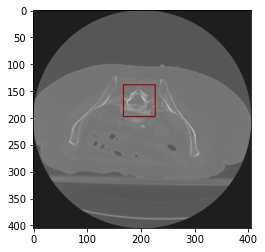

Episode 91 finished after 33.000000 time steps with total reward = 4.000000 (streak 1).
------------92
(163, 132)
current distance is: 14.035668847618199, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


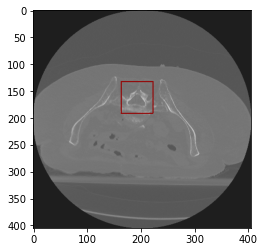

Episode 92 finished after 6859.000000 time steps with total reward = 8.000000 (streak 2).
------------93
(164, 127)
current distance is: 19.1049731745428, and future distance is 9.219544457292887
the stepsize has decreased and is now 5


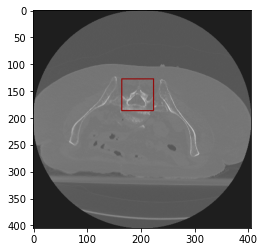

Episode 93 finished after 170.000000 time steps with total reward = 13.000000 (streak 0).
------------94
(171, 140)
current distance is: 19.4164878389476, and future distance is 9.848857801796104


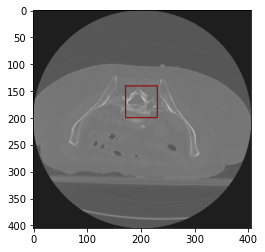

Episode 94 finished after 4.000000 time steps with total reward = 3.000000 (streak 0).
------------95
(153, 137)
current distance is: 19.026297590440446, and future distance is 9.055385138137417
the stepsize has decreased and is now 5


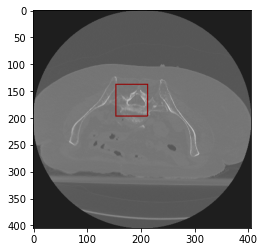

Episode 95 finished after 20.000000 time steps with total reward = 9.000000 (streak 1).
------------96
Episode 96 timed out at 8099 with total reward = -12.000000.
------------97
(154, 135)
current distance is: 12.041594578792296, and future distance is 8.06225774829855


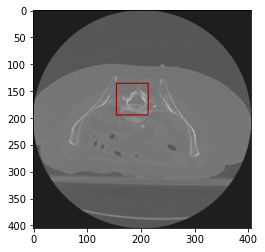

Episode 97 finished after 1.000000 time steps with total reward = 2.000000 (streak 2).
------------98
Episode 98 timed out at 8099 with total reward = -7.000000.
------------99
Episode 99 timed out at 8099 with total reward = 10.000000.
------------100
Episode 100 timed out at 8099 with total reward = -2.000000.
------------101
Episode 101 timed out at 8099 with total reward = -6.000000.
------------102
Episode 102 timed out at 8099 with total reward = 0.000000.
------------103
Episode 103 timed out at 8099 with total reward = -16.000000.
------------104
(168, 139)
current distance is: 14.317821063276353, and future distance is 6.708203932499369
the stepsize has decreased and is now 5


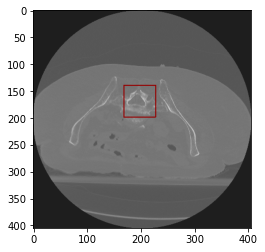

Episode 104 finished after 16.000000 time steps with total reward = 15.000000 (streak 3).
------------105
(164, 133)
current distance is: 13.152946437965905, and future distance is 3.605551275463989
the stepsize has decreased and is now 5


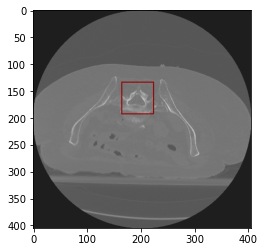

Episode 105 finished after 4871.000000 time steps with total reward = 14.000000 (streak 4).
------------106
(159, 140)
current distance is: 13.601470508735444, and future distance is 5.0
the stepsize has decreased and is now 5


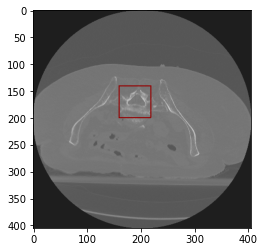

Episode 106 finished after 25.000000 time steps with total reward = 24.000000 (streak 0).
------------107
(165, 135)
current distance is: 13.038404810405298, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


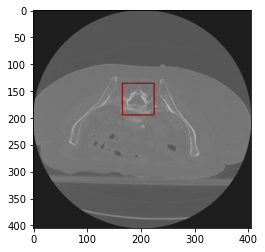

Episode 107 finished after 7721.000000 time steps with total reward = 11.000000 (streak 1).
------------108
(155, 136)
current distance is: 17.0, and future distance is 7.0
the stepsize has decreased and is now 5


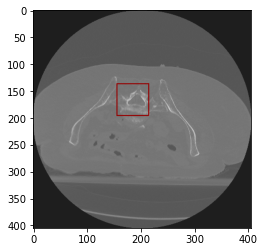

Episode 108 finished after 7141.000000 time steps with total reward = 22.000000 (streak 0).
------------109
Episode 109 timed out at 8099 with total reward = 3.000000.
------------110
(170, 135)
current distance is: 13.601470508735444, and future distance is 8.06225774829855


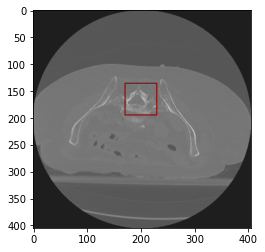

Episode 110 finished after 6511.000000 time steps with total reward = 4.000000 (streak 0).
------------111
Episode 111 timed out at 8099 with total reward = -10.000000.
------------112
Episode 112 timed out at 8099 with total reward = 8.000000.
------------113
(161, 133)
current distance is: 13.038404810405298, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


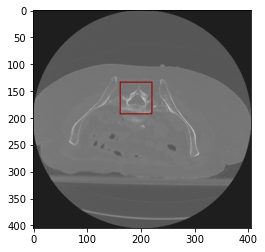

Episode 113 finished after 1495.000000 time steps with total reward = 15.000000 (streak 0).
------------114
(161, 140)
current distance is: 11.704699910719626, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


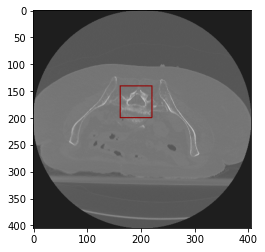

Episode 114 finished after 7151.000000 time steps with total reward = 12.000000 (streak 0).
------------115
(158, 134)
current distance is: 14.142135623730951, and future distance is 4.47213595499958
the stepsize has decreased and is now 5


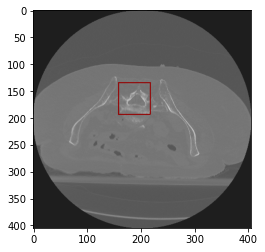

Episode 115 finished after 2192.000000 time steps with total reward = 20.000000 (streak 0).
------------116
(163, 132)
current distance is: 11.704699910719626, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


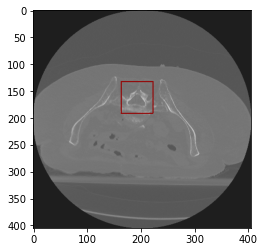

Episode 116 finished after 23.000000 time steps with total reward = 18.000000 (streak 0).
------------117
Episode 117 timed out at 8099 with total reward = 6.000000.
------------118
(159, 142)
current distance is: 16.278820596099706, and future distance is 6.708203932499369
the stepsize has decreased and is now 5


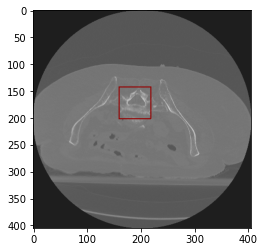

Episode 118 finished after 15.000000 time steps with total reward = 16.000000 (streak 1).
------------119
Episode 119 timed out at 8099 with total reward = -9.000000.
------------120
Episode 120 timed out at 8099 with total reward = -12.000000.
------------121
Episode 121 timed out at 8099 with total reward = -11.000000.
------------122
Episode 122 timed out at 8099 with total reward = -13.000000.
------------123
(153, 140)
current distance is: 10.816653826391969, and future distance is 9.848857801796104


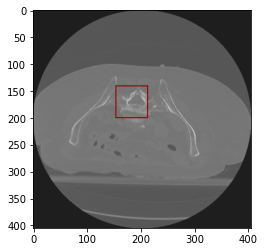

Episode 123 finished after 4870.000000 time steps with total reward = 12.000000 (streak 2).
------------124
Episode 124 timed out at 8099 with total reward = 7.000000.
------------125
(168, 140)
current distance is: 16.492422502470642, and future distance is 7.211102550927978
the stepsize has decreased and is now 5


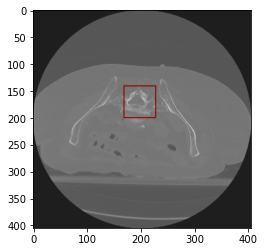

Episode 125 finished after 4.000000 time steps with total reward = 5.000000 (streak 0).
------------126
Episode 126 timed out at 8099 with total reward = 1.000000.
------------127
(154, 135)
current distance is: 13.601470508735444, and future distance is 8.06225774829855


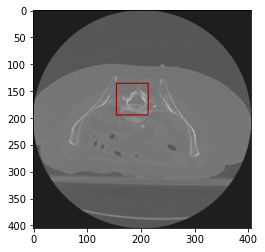

Episode 127 finished after 12.000000 time steps with total reward = 7.000000 (streak 1).
------------128
(171, 140)
current distance is: 19.4164878389476, and future distance is 9.848857801796104


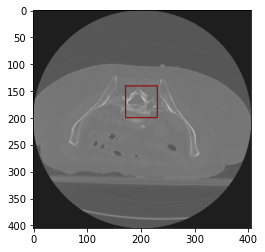

Episode 128 finished after 7621.000000 time steps with total reward = 14.000000 (streak 2).
------------129
Episode 129 timed out at 8099 with total reward = -4.000000.
------------130
Episode 130 timed out at 8099 with total reward = -2.000000.
------------131
(168, 135)
current distance is: 16.0312195418814, and future distance is 6.082762530298219
the stepsize has decreased and is now 5


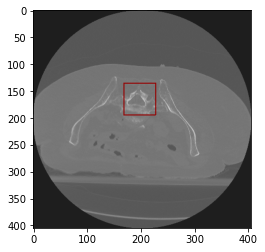

Episode 131 finished after 41.000000 time steps with total reward = 12.000000 (streak 0).
------------132
Episode 132 timed out at 8099 with total reward = 2.000000.
------------133
(165, 132)
current distance is: 14.317821063276353, and future distance is 5.0
the stepsize has decreased and is now 5


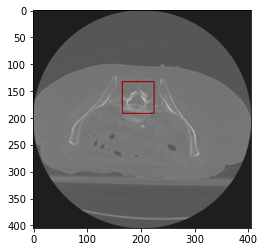

Episode 133 finished after 4435.000000 time steps with total reward = 14.000000 (streak 1).
------------134
(162, 132)
current distance is: 14.0, and future distance is 4.0
the stepsize has decreased and is now 5


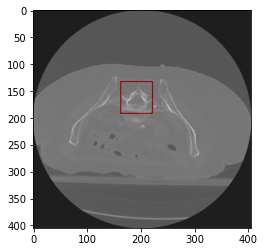

Episode 134 finished after 43.000000 time steps with total reward = 14.000000 (streak 0).
------------135
Episode 135 timed out at 8099 with total reward = -4.000000.
------------136
Episode 136 timed out at 8099 with total reward = -5.000000.
------------137
Episode 137 timed out at 8099 with total reward = -6.000000.
------------138
(154, 132)
current distance is: 18.439088914585774, and future distance is 8.94427190999916
the stepsize has decreased and is now 5


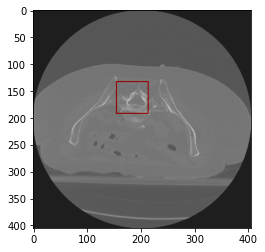

Episode 138 finished after 2.000000 time steps with total reward = 1.000000 (streak 1).
------------139
(159, 140)
current distance is: 13.601470508735444, and future distance is 5.0
the stepsize has decreased and is now 5


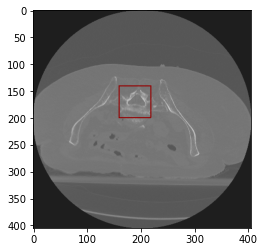

Episode 139 finished after 24.000000 time steps with total reward = 23.000000 (streak 2).
------------140
(171, 139)
current distance is: 15.811388300841896, and future distance is 9.486832980505138


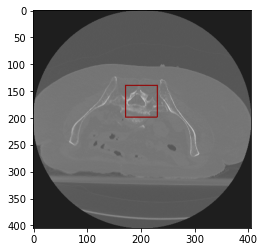

Episode 140 finished after 8.000000 time steps with total reward = 9.000000 (streak 3).
------------141
(167, 137)
current distance is: 10.295630140987, and future distance is 5.0990195135927845
the stepsize has decreased and is now 5


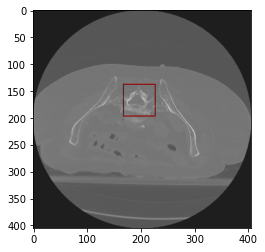

Episode 141 finished after 6266.000000 time steps with total reward = 22.000000 (streak 4).
------------142
(161, 137)
current distance is: 11.045361017187261, and future distance is 1.4142135623730951
the stepsize has decreased and is now 5


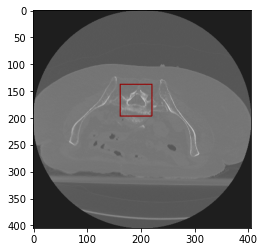

Episode 142 finished after 53.000000 time steps with total reward = 22.000000 (streak 0).
------------143
(170, 134)
current distance is: 18.110770276274835, and future distance is 8.246211251235321
the stepsize has decreased and is now 5


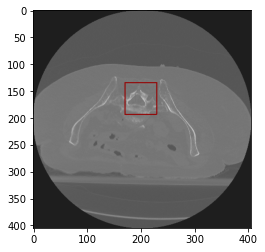

Episode 143 finished after 996.000000 time steps with total reward = 15.000000 (streak 1).
------------144
Episode 144 timed out at 8099 with total reward = 2.000000.
------------145
(171, 134)
current distance is: 19.1049731745428, and future distance is 9.219544457292887
the stepsize has decreased and is now 5


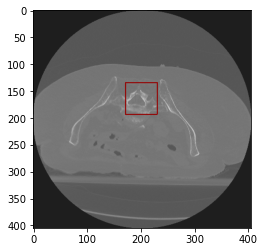

Episode 145 finished after 88.000000 time steps with total reward = 23.000000 (streak 0).
------------146
(166, 141)
current distance is: 14.866068747318506, and future distance is 6.4031242374328485
the stepsize has decreased and is now 5


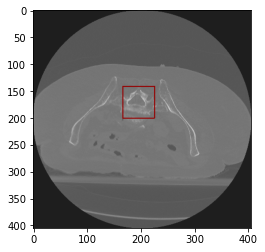

Episode 146 finished after 2478.000000 time steps with total reward = 13.000000 (streak 0).
------------147
(160, 138)
current distance is: 12.165525060596439, and future distance is 2.8284271247461903
the stepsize has decreased and is now 5


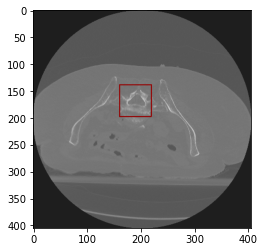

Episode 147 finished after 1595.000000 time steps with total reward = 7.000000 (streak 0).
------------148
Episode 148 timed out at 8099 with total reward = -3.000000.
------------149
(161, 140)
current distance is: 11.704699910719626, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


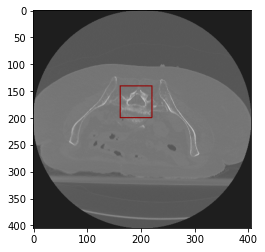

Episode 149 finished after 35.000000 time steps with total reward = 6.000000 (streak 0).
------------150
(161, 139)
current distance is: 11.40175425099138, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


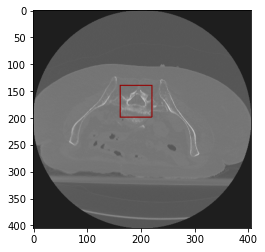

Episode 150 finished after 3289.000000 time steps with total reward = 11.000000 (streak 1).
------------151
Episode 151 timed out at 8099 with total reward = 12.000000.
------------152
Episode 152 timed out at 8099 with total reward = -10.000000.
------------153
(170, 137)
current distance is: 18.027756377319946, and future distance is 8.06225774829855
the stepsize has decreased and is now 5


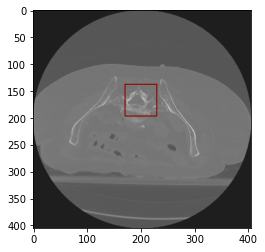

Episode 153 finished after 7532.000000 time steps with total reward = 17.000000 (streak 0).
------------154
(162, 132)
current distance is: 10.770329614269007, and future distance is 4.0
the stepsize has decreased and is now 5


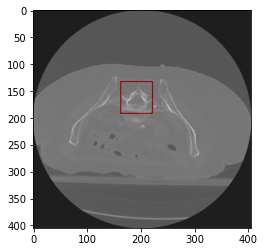

Episode 154 finished after 1049.000000 time steps with total reward = 8.000000 (streak 0).
------------155
(158, 136)
current distance is: 10.770329614269007, and future distance is 4.0
the stepsize has decreased and is now 5


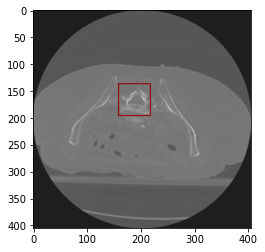

Episode 155 finished after 7344.000000 time steps with total reward = 17.000000 (streak 0).
------------156
(155, 136)
current distance is: 17.0, and future distance is 7.0
the stepsize has decreased and is now 5


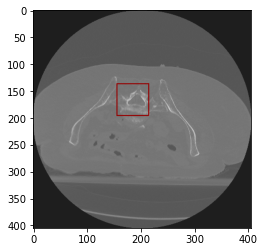

Episode 156 finished after 6.000000 time steps with total reward = 7.000000 (streak 0).
------------157
Episode 157 timed out at 8099 with total reward = -12.000000.
------------158
(163, 127)
current distance is: 19.026297590440446, and future distance is 9.055385138137417
the stepsize has decreased and is now 5


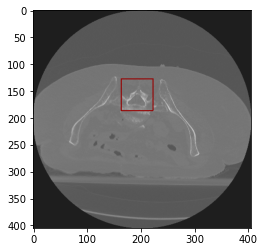

Episode 158 finished after 31.000000 time steps with total reward = 6.000000 (streak 1).
------------159
(164, 130)
current distance is: 16.1245154965971, and future distance is 6.324555320336759
the stepsize has decreased and is now 5


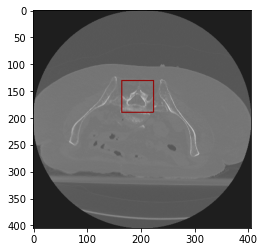

Episode 159 finished after 16.000000 time steps with total reward = 13.000000 (streak 2).
------------160
Episode 160 timed out at 8099 with total reward = -13.000000.
------------161
Episode 161 timed out at 8099 with total reward = 0.000000.
------------162
(162, 121)
current distance is: 5.0, and future distance is 15.0


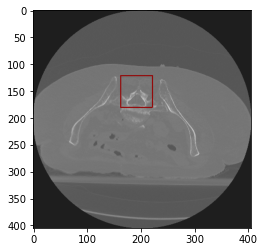

Episode 162 finished after 0.000000 time steps with total reward = 1.000000 (streak 3).
------------163
(164, 135)
current distance is: 11.180339887498949, and future distance is 2.23606797749979
the stepsize has decreased and is now 5


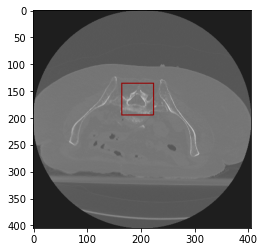

Episode 163 finished after 11.000000 time steps with total reward = 6.000000 (streak 4).
------------164
(164, 127)
current distance is: 19.1049731745428, and future distance is 9.219544457292887
the stepsize has decreased and is now 5


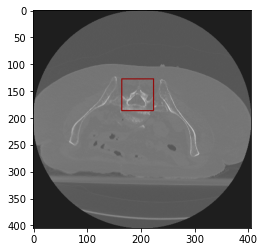

Episode 164 finished after 5.000000 time steps with total reward = 4.000000 (streak 5).
------------165
(163, 138)
current distance is: 12.041594578792296, and future distance is 2.23606797749979
the stepsize has decreased and is now 5


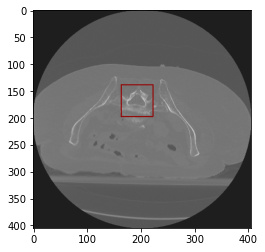

Episode 165 finished after 4.000000 time steps with total reward = 5.000000 (streak 6).
------------166
Episode 166 timed out at 8099 with total reward = 0.000000.
------------167
Episode 167 timed out at 8099 with total reward = -4.000000.
------------168
Episode 168 timed out at 8099 with total reward = -4.000000.
------------169
(163, 139)
current distance is: 13.038404810405298, and future distance is 3.1622776601683795
the stepsize has decreased and is now 5


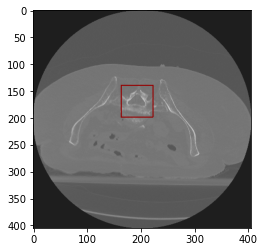

Episode 169 finished after 11.000000 time steps with total reward = 12.000000 (streak 7).
------------170
(158, 144)
current distance is: 18.439088914585774, and future distance is 8.94427190999916
the stepsize has decreased and is now 5


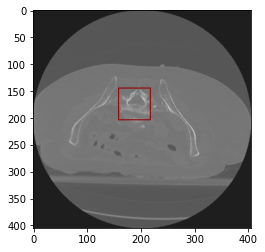

Episode 170 finished after 9.000000 time steps with total reward = 10.000000 (streak 8).
------------171
(155, 131)
current distance is: 17.72004514666935, and future distance is 8.602325267042627
the stepsize has decreased and is now 5


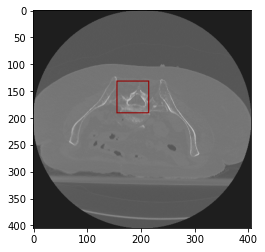

Episode 171 finished after 4612.000000 time steps with total reward = 4.000000 (streak 9).
------------172
(163, 137)
current distance is: 11.045361017187261, and future distance is 1.4142135623730951
the stepsize has decreased and is now 5


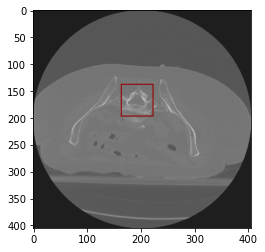

Episode 172 finished after 10.000000 time steps with total reward = 11.000000 (streak 0).
------------173
(166, 135)
current distance is: 14.035668847618199, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


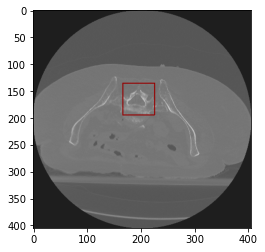

Episode 173 finished after 38.000000 time steps with total reward = 13.000000 (streak 1).
------------174
(164, 139)
current distance is: 12.36931687685298, and future distance is 3.605551275463989
the stepsize has decreased and is now 5


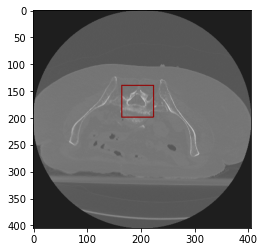

Episode 174 finished after 7948.000000 time steps with total reward = 8.000000 (streak 2).
------------175
(157, 136)
current distance is: 11.180339887498949, and future distance is 5.0
the stepsize has decreased and is now 5


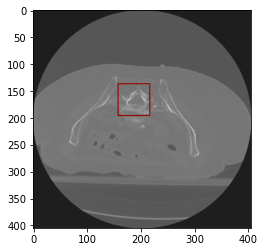

Episode 175 finished after 5182.000000 time steps with total reward = 4.000000 (streak 0).
------------176
(163, 132)
current distance is: 11.704699910719626, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


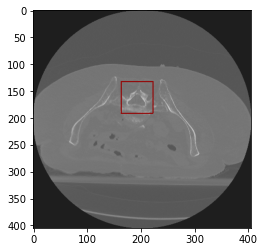

Episode 176 finished after 23.000000 time steps with total reward = 24.000000 (streak 0).
------------177
(156, 129)
current distance is: 18.027756377319946, and future distance is 9.219544457292887


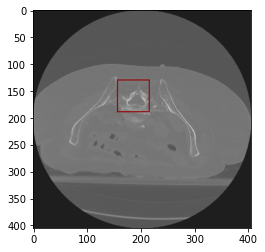

Episode 177 finished after 1568.000000 time steps with total reward = 17.000000 (streak 1).
------------178
(162, 132)
current distance is: 10.770329614269007, and future distance is 4.0
the stepsize has decreased and is now 5


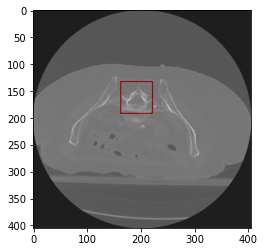

Episode 178 finished after 1721.000000 time steps with total reward = 10.000000 (streak 0).
------------179
Episode 179 timed out at 8099 with total reward = -1.000000.
------------180
(162, 132)
current distance is: 10.770329614269007, and future distance is 4.0
the stepsize has decreased and is now 5


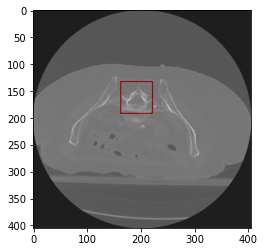

Episode 180 finished after 3.000000 time steps with total reward = 2.000000 (streak 0).
------------181
(163, 132)
current distance is: 11.704699910719626, and future distance is 4.123105625617661
the stepsize has decreased and is now 5


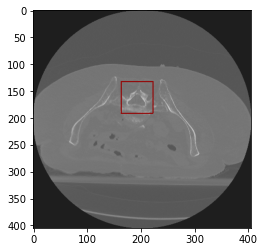

Episode 181 finished after 10.000000 time steps with total reward = 9.000000 (streak 1).
------------182
(153, 135)
current distance is: 19.026297590440446, and future distance is 9.055385138137417
the stepsize has decreased and is now 5


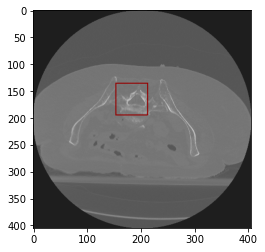

Episode 182 finished after 10.000000 time steps with total reward = 9.000000 (streak 2).
------------183
Episode 183 timed out at 8099 with total reward = -3.000000.
------------184
(157, 128)
current distance is: 18.681541692269406, and future distance is 9.433981132056603


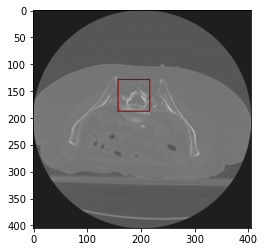

Episode 184 finished after 2448.000000 time steps with total reward = 9.000000 (streak 3).
------------185
(167, 137)
current distance is: 15.033296378372908, and future distance is 5.0990195135927845
the stepsize has decreased and is now 5


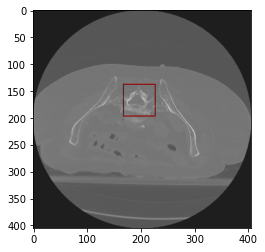

Episode 185 finished after 60.000000 time steps with total reward = 15.000000 (streak 0).
------------186
Episode 186 timed out at 8099 with total reward = -15.000000.
------------187
Episode 187 timed out at 8099 with total reward = 15.000000.
------------188
(170, 132)
current distance is: 18.439088914585774, and future distance is 8.94427190999916
the stepsize has decreased and is now 5


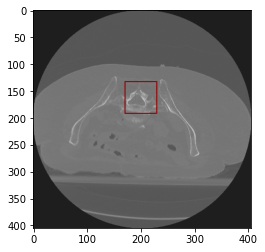

Episode 188 finished after 6364.000000 time steps with total reward = 17.000000 (streak 1).
------------189


In [7]:
# Run Training 

# This is for no grid gray scale. 
#    def __init__(self, maze_file = None, width=None,height=None,target_x = None, target_y = None)
#env_qlearn = gym.make('maze-v0',height=60,width=60, target_x = 135, target_y = 180)
env_qlearn = gym.make('maze-v0',height=60,width=60)
#Make Q table
q_table0 = np.zeros((405,405) + (4,), dtype=float)

# still uses a 9x9 grid. 
#env_qlearn = gym.make('maze-v0')
#Make Q Table 
#q_table0 = np.zeros((9,9) + (4,), dtype=float)


fin_q_table, num_steps, episode_reward  = run_qlearn(env_qlearn,q_table0,explore_rate,learning_rate,neps=200,tstep=max_t)

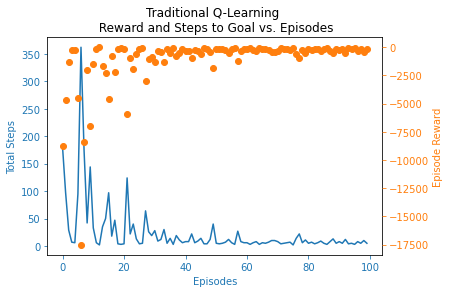

In [ ]:
import matplotlib.pyplot as plt
# length = len(fit.history['nb_episode_steps'])
length = 100
fig = plt.figure()
ax = fig.add_subplot(111, label="1")
ax2 = fig.add_subplot(111, label="2", frame_on=False)
ax.plot(range(length), num_steps[0:100], color="C0")
ax.set_xlabel("Episodes", color="C0")
ax.set_ylabel("Total Steps", color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")
ax2.scatter(range(length), episode_reward[0:100], color="C1")
ax2.axes.get_xaxis().set_visible(False)
ax2.yaxis.tick_right()
ax2.set_ylabel('Episode Reward', color="C1")
ax2.yaxis.set_label_position('right')
ax2.tick_params(axis='y', colors="C1")
ax.set_title("Traditional Q-Learning \n Reward and Steps to Goal vs. Episodes")
fig.savefig(f"Thresholded_Traditional_Q_learn_{length}eps")

In [ ]:
fin_q_table.shape

(10, 10, 4)

In [ ]:
sum(num_steps[100::])/len(num_steps[100::])

8.73913043478261

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#### ACTION = ["N", "S", "E", "W"]

<AxesSubplot:>

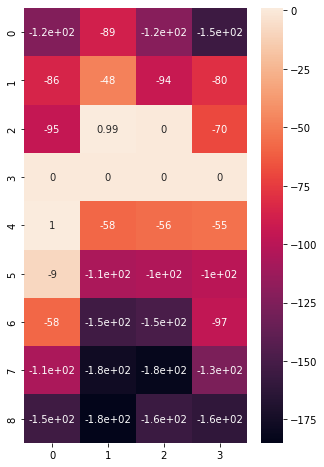

In [ ]:
fig,ax = plt.subplots(figsize=(5,8))
sns.heatmap(fin_q_table[4,:,:],annot=True)